In [33]:
import sys
import os

# Add "api-server/" (which contains "app") to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "../..")))


In [34]:
from app.services.node.topic_node import extract_topic
from app.services.node.sub_topic_node import extract_sub_topic
from app.services.node.suggest_topic_node import suggest_sub_topic
from app.services.state import TutorState

from langgraph.graph import StateGraph, END

In [35]:
graph=StateGraph(TutorState)

graph.add_node("Topic_Detection",extract_topic)
graph.add_node("SubTopic_Detection",extract_sub_topic)
graph.add_node("SubTopic_Suggestor",suggest_sub_topic)
graph.set_entry_point("Topic_Detection")

In [36]:
graph.add_conditional_edges(
    "Topic_Detection",
    lambda state: (
        "SubTopic_Detection" if state.get("granularity", "").lower() == "focused"
        else "SubTopic_Suggestor"
    )
)
graph.add_edge("SubTopic_Detection","__end__")
graph.add_edge("SubTopic_Suggestor",END)
patient_graph=graph.compile()

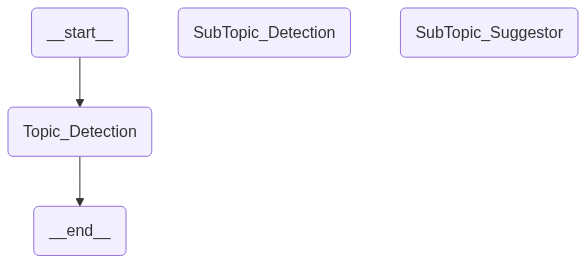

In [37]:
from IPython.display import Image, display
display(Image(patient_graph.get_graph().draw_mermaid_png()))